In [26]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [27]:
#Names: Raghvandersinh Solanki, Ian Mays, and Dustin McDonnell

In [28]:
#from google.colab import drive
#drive.mount('/content/drive')


In [29]:
heart_data = pd.read_csv('heart.csv')
df = pd.DataFrame(heart_data)
torch.manual_seed(42)


In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [32]:
X = df.drop('target', axis=1)
y = df['target']

In [33]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2


In [34]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 13)
(308, 13)
(717,)
(308,)


In [37]:
X_train.values

array([[ 0.50352033,  1.        ,  1.        , ...,  2.        ,
         0.        ,  2.        ],
       [ 0.39324077,  1.        ,  0.        , ...,  1.        ,
         3.        ,  3.        ],
       [-1.15067305,  0.        ,  2.        , ...,  1.        ,
         1.        ,  2.        ],
       ...,
       [-0.37871614,  1.        ,  0.        , ...,  2.        ,
         0.        ,  3.        ],
       [-1.26095261,  1.        ,  0.        , ...,  2.        ,
         0.        ,  3.        ],
       [-0.26843658,  1.        ,  0.        , ...,  2.        ,
         1.        ,  2.        ]])

In [38]:
y_train.values

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [40]:
X_train = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float32).to(device)

In [41]:
X_train

tensor([[ 0.5035,  1.0000,  1.0000,  ...,  2.0000,  0.0000,  2.0000],
        [ 0.3932,  1.0000,  0.0000,  ...,  1.0000,  3.0000,  3.0000],
        [-1.1507,  0.0000,  2.0000,  ...,  1.0000,  1.0000,  2.0000],
        ...,
        [-0.3787,  1.0000,  0.0000,  ...,  2.0000,  0.0000,  3.0000],
        [-1.2610,  1.0000,  0.0000,  ...,  2.0000,  0.0000,  3.0000],
        [-0.2684,  1.0000,  0.0000,  ...,  2.0000,  1.0000,  2.0000]],
       device='cuda:0')

In [42]:
y_train

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 

In [43]:
class HeartDiseaseModel(nn.Module):
  def __init__(self):
    super(HeartDiseaseModel, self).__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(13, 16),
        nn.ReLU(),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, 1),


    )
  def forward(self, x):
    return self.linear_stack(x)


In [44]:
model = HeartDiseaseModel().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.03)

In [45]:
# # prompt: Create a Dataloader for train and test

# from torch.utils.data import TensorDataset, DataLoader

# # Create TensorDatasets for train and test data
# train_dataset = TensorDataset(X_train, y_train)
# test_dataset = TensorDataset(X_test, y_test)

# # Create DataLoaders for train and test data
# train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [46]:
train_losses =[]
test_losses = []
train_accuracies = []
test_accuracies = []
epochs = 7000
for epoch in range(epochs):
# for batch, (X_train, y_train) in enumerate(train_dataloader):
  model.train()
  y_pred = model(X_train)
  train_loss = loss_fn(y_pred, y_train.unsqueeze(1))
  train_losses.append(train_loss.item())
  train_pred = (torch.sigmoid(y_pred) > 0.5).float()  # Adjust threshold based on your problem
  train_accuracy = (train_pred.eq(y_train.unsqueeze(1)).sum().item()) / len(y_train)
  train_accuracies.append(train_accuracy)
  optim.zero_grad()
  train_loss.backward()
  optim.step()

  model.eval()
  with torch.inference_mode():
  # for batch, (X_test, y_test) in enumerate(test_dataloader):
    y_pred = model(X_test)
    test_loss = loss_fn(y_pred, y_test.unsqueeze(1))
    test_losses.append(test_loss.item())
    test_pred = (torch.sigmoid(y_pred) > 0.5).float()  # Adjust threshold based on your problem
    test_accuracy = (test_pred.eq(y_test.unsqueeze(1)).sum().item()) / len(y_test)
    test_accuracies.append(test_accuracy)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Train Loss: {train_loss.item()}, Train Accuracy: {train_accuracy:.4f}, "
                  f"Test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy:.4f}")

Epoch: 0, Train Loss: 0.7241907119750977, Train Accuracy: 0.4742, Test Loss: 0.7084782123565674, Test Accuracy: 0.5162
Epoch: 100, Train Loss: 0.6862147450447083, Train Accuracy: 0.4742, Test Loss: 0.6818766593933105, Test Accuracy: 0.5162
Epoch: 200, Train Loss: 0.6393210887908936, Train Accuracy: 0.7559, Test Loss: 0.6376129984855652, Test Accuracy: 0.7305
Epoch: 300, Train Loss: 0.5235536098480225, Train Accuracy: 0.7838, Test Loss: 0.5288103818893433, Test Accuracy: 0.7240
Epoch: 400, Train Loss: 0.41730186343193054, Train Accuracy: 0.8145, Test Loss: 0.44838690757751465, Test Accuracy: 0.7727
Epoch: 500, Train Loss: 0.37628602981567383, Train Accuracy: 0.8326, Test Loss: 0.43041086196899414, Test Accuracy: 0.7760
Epoch: 600, Train Loss: 0.36150842905044556, Train Accuracy: 0.8466, Test Loss: 0.4273650050163269, Test Accuracy: 0.7890
Epoch: 700, Train Loss: 0.3529827892780304, Train Accuracy: 0.8605, Test Loss: 0.424237996339798, Test Accuracy: 0.7987
Epoch: 800, Train Loss: 0.3474

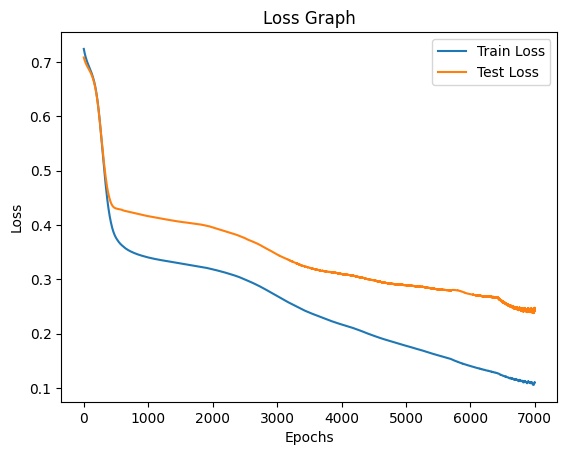

In [47]:

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.show()

In [48]:
# prompt: Display the accuracy of the model

with torch.inference_mode():
  y_pred = model(X_test)
  y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
  accuracy = (y_pred_class == y_test.unsqueeze(1)).float().mean()
  print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9026
